In [1]:
import pandas as pd
import keras as K
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model,Model
from keras import models,layers
import tensorflow as tf

In [2]:
from matplotlib import pyplot as plt 
from PIL import Image
import os
%matplotlib inline 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series,DataFrame
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier

In [3]:
model_Best = 'Best_Model.h5'
model = load_model(model_Best)

resnet_model = Model(inputs=model.input, outputs=model.get_layer('activation_49').output)
ppmodel = models.Sequential()
ppmodel.add(resnet_model)
ppmodel.add(layers.GlobalAveragePooling2D())  # ppmodel是为了把图片变成向量
ppmodel.trainable = False

In [4]:
def get_train_imgs(filePath,
#                    img_size = 150,
                   rotation_range = 360,
                   width_shift_range = 0.2,
                   height_shift_range = 0.2,
                   shear_range = 0.2,
                   zoom_range = 0.2,
                   horizontal_filp = True,
                   fill_mode = 'nearest'):
    '''读取图片数据
    filePath:传入图片文件夹的上一级路径
    img_size = 150,将图像剪成正方形，默认边长为150
    rotation_range = 360,图片数据增强，对图片进行随机翻转，默认随机翻转的角度在360内
    width_shift_range = 0.2,Float, 1-D array-like or int
        - float: fraction of total width, if < 1, or pixels if >= 1.
        - 1-D array-like: random elements from the array.
        - int: integer number of pixels from interval
            `(-width_shift_range, +width_shift_range)`
        - With `width_shift_range=2` possible values
            are integers `[-1, 0, +1]`,
            same as with `width_shift_range=[-1, 0, +1]`,
            while with `width_shift_range=1.0` possible values are floats
            in the interval [-1.0, +1.0).
        Default:0.2
    height_shift_range = 0.2,Float, 1-D array-like or int,
        - float: fraction of total height, if < 1, or pixels if >= 1.
        - 1-D array-like: random elements from the array.
        - int: integer number of pixels from interval
            `(-height_shift_range, +height_shift_range)`
        - With `height_shift_range=2` possible values
            are integers `[-1, 0, +1]`,
            same as with `height_shift_range=[-1, 0, +1]`,
            while with `height_shift_range=1.0` possible values are floats
            in the interval [-1.0, +1.0).
        Default:0.2
    shear_range = 0.2,Float,图片剪切强度，默认0.2
    zoom_range = 0.2,图片随机缩放范围，默认0.2
    horizontal_filp = True,Boolean,图片水平随机翻转输入,默认True
    fill_mode = 'nearest',缺失部分的填充，['constant','nearest','reflect','wrap']，默认'nearest'
    increase = False,是否进行数据增强,默认False
    num = 10,每张图片增加数量，若increase = False,num = null;若increase = True,num默认10
    ret-->   data'''
    from keras.preprocessing.image import ImageDataGenerator
    data_generate = ImageDataGenerator(rotation_range = 360 ,
                                       width_shift_range=0.2,
                                       height_shift_range = 0.2,
                                       shear_range=0.2,
                                       zoom_range = 0.2,
                                       horizontal_flip = True,
                                       fill_mode = 'nearest')
    from keras.preprocessing.image import img_to_array,load_img
    name = os.listdir(filePath)
    import pandas as pd
    from pandas import DataFrame
    #from multiprocessing import Pool
    #pool = Pool(num)
    data = pd.DataFrame()
    target = pd.DataFrame()
    #target_num = 0
    target = []
    for i in range(len(name)):
        root = os.path.abspath(filePath)
        root = os.path.join(root,name[i])
        fs = os.listdir(root)
        imgs = []
        if fs == []:
            continue
        #target_num += 1
        for f in fs:
            f = os.path.join(root,f)
            try:
                img = Image.open(f) 
            except:
                print(f,fs)
            img = np.array(img)
            img = K.applications.resnet50.preprocess_input(img)
#             img = img.resize((img_size,img_size))
            img = np.array(img)
            img = np.expand_dims(img[:,:,:3],axis = 0 )
            if len(f)<=30:
                ii = 0
                num = 7
                for img in data_generate.flow(img,batch_size = 1,save_prefix = 'cat',save_format = 'jpeg'):
                    ii += 1
                    #print(img.shape)
                    #img = np.expand_dims(img[:,:,:3],axis = 0 )
                    imgs.append(img)
                    target.append(i)
                    if ii>num:
                        break
            elif len(f)>30 and len(f)<=50:
                ii = 0
                num = 4
                for img in data_generate.flow(img,batch_size = 1,save_prefix = 'cat',save_format = 'jpeg'):
                    ii += 1
                    #print(img.shape)
                    #img = np.expand_dims(img[:,:,:3],axis = 0 )
                    imgs.append(img)
                    target.append(i)
                    if ii>num:
                        break
            elif len(f)>50 and len(f)<=100:
                ii = 0
                num = 2
                for img in data_generate.flow(img,batch_size = 1,save_prefix = 'cat',save_format = 'jpeg'):
                    ii += 1
                     #print(img.shape)
                     #img = np.expand_dims(img[:,:,:3],axis = 0 )
                    imgs.append(img)
                    target.append(i)
                    if ii>num:
                        break
#             elif len(f)>100 and len(f)<=200:
#                 ii = 0
#                 num = 2
#                 for img in data_generate.flow(img,batch_size = 1,save_prefix = 'cat',save_format = 'jpeg'):
#                     ii += 1
#                     #print(img.shape)
#                     #img = np.expand_dims(img[:,:,:3],axis = 0 )
#                     imgs.append(img)
#                     target.append(i)
#                     if ii>num:
#                         break
            else:
                imgs.append(img)
                target.append(i)
        imgs = np.concatenate(imgs,axis = 0)
        feature = ppmodel.predict(imgs)
        if i == 0:
            data = pd.DataFrame(feature)
        else:
            data = data.append(pd.DataFrame(feature),ignore_index = True)
    #pool.apply_async(img_read,args = (i,filePath,name))
    #pool.close()
    #pool.join()
    target = pd.DataFrame(target)
    data['target'] = target
    return data

In [5]:
def get_train_imgs(filePath,
                   img_size = 150,
                   rotation_range = 360,
                   width_shift_range = 0.2,
                   height_shift_range = 0.2,
                   shear_range = 0.2,
                   zoom_range = 0.2,
                   horizontal_filp = True,
                   fill_mode = 'nearest',
                   increase = False,
                   num = 10):
    '''读取图片数据
    filePath:传入图片文件夹的上一级路径
    img_size = 150,将图像剪成正方形，默认边长为150
    rotation_range = 360,图片数据增强，对图片进行随机翻转，默认随机翻转的角度在360内
    width_shift_range = 0.2,Float, 1-D array-like or int
        - float: fraction of total width, if < 1, or pixels if >= 1.
        - 1-D array-like: random elements from the array.
        - int: integer number of pixels from interval
            `(-width_shift_range, +width_shift_range)`
        - With `width_shift_range=2` possible values
            are integers `[-1, 0, +1]`,
            same as with `width_shift_range=[-1, 0, +1]`,
            while with `width_shift_range=1.0` possible values are floats
            in the interval [-1.0, +1.0).
        Default:0.2
    height_shift_range = 0.2,Float, 1-D array-like or int,
        - float: fraction of total height, if < 1, or pixels if >= 1.
        - 1-D array-like: random elements from the array.
        - int: integer number of pixels from interval
            `(-height_shift_range, +height_shift_range)`
        - With `height_shift_range=2` possible values
            are integers `[-1, 0, +1]`,
            same as with `height_shift_range=[-1, 0, +1]`,
            while with `height_shift_range=1.0` possible values are floats
            in the interval [-1.0, +1.0).
        Default:0.2
    shear_range = 0.2,Float,图片剪切强度，默认0.2
    zoom_range = 0.2,图片随机缩放范围，默认0.2
    horizontal_filp = True,Boolean,图片水平随机翻转输入,默认True
    fill_mode = 'nearest',缺失部分的填充，['constant','nearest','reflect','wrap']，默认'nearest'
    increase = False,是否进行数据增强,默认False
    num = 10,每张图片增加数量，若increase = False,num = null;若increase = True,num默认10
    ret-->   data'''
    from keras.preprocessing.image import ImageDataGenerator
    data_generate = ImageDataGenerator(rotation_range = 360 ,
                                       width_shift_range=0.2,
                                       height_shift_range = 0.2,
                                       shear_range=0.2,
                                       zoom_range = 0.2,
                                       horizontal_flip = True,
                                       fill_mode = 'nearest')
    from keras.preprocessing.image import img_to_array,load_img
    name = os.listdir(filePath)
    import pandas as pd
    from pandas import DataFrame
    #from multiprocessing import Pool
    #pool = Pool(num)
    data = pd.DataFrame()
    target = pd.DataFrame()
    #target_num = 0
    target = []
    for i in range(len(name)):
        root = os.path.abspath(filePath)
        root = os.path.join(root,name[i])
        fs = os.listdir(root)
        imgs = []
        if fs == []:
            continue
        #target_num += 1
        for f in fs:
            f = os.path.join(root,f)
            try:
                img = Image.open(f) 
            except:
                print(f,fs)
#             img = img.resize((img_size,img_size))
            img = np.array(img)
            img = K.applications.resnet50.preprocess_input(img)
            img = np.array(img)
            img = np.expand_dims(img[:,:,:3],axis = 0 )
            if increase == True:
                ii = 0
                for img in data_generate.flow(img,batch_size = 1,save_prefix = 'cat',save_format = 'jpeg'):
                    ii += 1
                    #print(img.shape)
                    #img = np.expand_dims(img[:,:,:3],axis = 0 )
                    imgs.append(img)
                    target.append(i)
                    if ii>num:
                        break
            else:
                imgs.append(img)
                target.append(i)
        imgs = np.concatenate(imgs,axis = 0)
        feature = ppmodel.predict(imgs)
        if i == 0:
            data = pd.DataFrame(feature)
        else:
            data = data.append(pd.DataFrame(feature),ignore_index = True)
    #pool.apply_async(img_read,args = (i,filePath,name))
    #pool.close()
    #pool.join()
    target = pd.DataFrame(target)
    data['target'] = target
    return data

In [6]:
filePath = 'D:\精东\img_copy'

In [7]:
data = get_train_imgs(filePath)

In [9]:
data

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,target
0,0.246043,0.000000,0.000000,0.000422,0.061016,0.000000,0.082943,0.085702,0.012009,0.000000,...,0.191922,0.561442,0.356290,0.123443,0.022493,0.002204,0.156945,0.181511,0.144223,0
1,0.209180,0.056061,0.014026,0.053131,0.025566,0.018310,0.062499,0.100471,0.034681,0.002053,...,0.150858,0.183352,0.405038,1.223381,0.031196,0.114262,0.010920,0.045814,0.151988,0
2,0.144588,0.000000,0.004372,0.076799,0.000000,0.000000,0.000000,0.509555,0.008310,0.000000,...,0.152967,0.058778,0.588989,0.345887,0.022785,0.386016,0.095010,0.000725,0.139925,0
3,0.247623,0.000000,0.003450,0.038212,0.000000,0.021400,0.010863,0.130903,0.013016,0.009804,...,0.176444,0.249778,0.254040,1.424925,0.202986,0.214189,0.049934,0.024527,0.184042,0
4,0.531359,0.000000,0.000000,0.000000,0.024638,0.017462,0.118914,0.124425,0.007833,0.000000,...,0.018069,0.065482,0.247183,0.000000,0.042151,0.749971,0.050275,0.009710,0.033410,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122690,0.277724,0.000993,0.091238,0.449603,0.004161,0.033179,0.194955,0.080220,0.009768,0.494933,...,0.002693,0.000000,0.000000,0.209120,0.031741,1.251660,0.057291,0.000000,0.000000,103
122691,0.247102,0.000000,0.057006,0.122209,0.017137,0.108453,0.134279,0.008223,0.351867,0.503430,...,0.031012,0.008986,0.010703,0.337156,0.013785,0.097692,0.314765,0.022721,0.088925,103
122692,0.637729,0.000000,0.140024,0.169392,0.085654,0.001941,0.192830,0.003366,0.042786,0.334425,...,0.058649,0.007928,0.000000,0.179115,0.013200,0.200949,0.127619,0.034395,0.165556,103
122693,0.258330,0.000000,0.141237,0.000000,0.000000,0.003901,0.127260,0.000375,0.091046,0.154798,...,0.012237,0.005852,0.000000,0.010569,0.055792,0.574504,0.422485,0.000000,0.019772,103


In [8]:
def rf(data = None,n_estimators = 50,train_size = 0.6,random_state = 1,max_depth=None,sts = False,have_data = False,x_train = None,x_test = None,y_train = None,y_test = None):
    '''随机森林
    n_estimators:基分类器的个数
    train)
    sts:标准化处理,默认False
    ret-->    projection_result,score'''
    if have_data == False:
        target = data['target']
        data_ = data.drop(['target'],axis = 1)
        if sts == True:
            data_ = StandardScaler().fit_transform(data_)
        x_train,x_test,y_train,y_test = train_test_split(data_, target, random_state=random_state, train_size=train_size,stratify=target)
    print(np.unique(y_train).size,np.unique(y_test).size)
    RF = RandomForestClassifier(n_estimators = n_estimators,max_depth=max_depth)
    clf = RF.fit(x_train,y_train)
    score_train = RF.score(x_train,y_train)
    score_test = RF.score(x_test,y_test)
    return [clf,score_train,score_test]

# 特征选择

In [17]:
from sklearn.feature_selection import SelectFromModel
a = clf.feature_importances_.max()
b = clf.feature_importances_.min()
s_tr = []
s_te = []
for threshold in np.linspace(b,a,100):
    x_var = data.iloc[:,:-1]
    y = np.copy(data.iloc[:,-1])
    RFC_ = RandomForestClassifier(n_estimators = 100,random_state = 42,max_depth = 45)#随机森林实例化
    x_var = SelectFromModel(RFC_,threshold = threshold).fit_transform(x_var,y)
    x_var = pd.DataFrame(x_var)
    x_var['target'] = np.copy(data.iloc[:,-1])
    data_model,score_train,score_test = rf(data = x_var,random_state = 0,train_size = 0.8,sts = True,max_depth = 45)
    s_tr.append(score_train)
    s_te.append(score_test)
    print('threshold =',threshold)
    print('特征数量为：',len(x_var.columns)-1)
    print('训练集准确率:%f'%score_train)
    print('测试集准确率:%f'%score_test)
    print('-'*100)

104 104
threshold = 0.00014330032412417486
特征数量为： 2047
训练集准确率:1.000000
测试集准确率:0.774480
----------------------------------------------------------------------------------------------------
104 104
threshold = 0.00017529103064017142
特征数量为： 2046
训练集准确率:1.000000
测试集准确率:0.767136
----------------------------------------------------------------------------------------------------
104 104
threshold = 0.000207281737156168
特征数量为： 2026
训练集准确率:1.000000
测试集准确率:0.771420
----------------------------------------------------------------------------------------------------
104 104
threshold = 0.00023927244367216455
特征数量为： 1957
训练集准确率:1.000000
测试集准确率:0.766524
----------------------------------------------------------------------------------------------------
104 104
threshold = 0.0002712631501881611
特征数量为： 1847
训练集准确率:1.000000
测试集准确率:0.769584
----------------------------------------------------------------------------------------------------
104 104
threshold = 0.00030325385670415767
特征数量为： 1688
训练集准确率:1

104 104
threshold = 0.0015828821173440202
特征数量为： 20
训练集准确率:1.000000
测试集准确率:0.492656
----------------------------------------------------------------------------------------------------
104 104
threshold = 0.0016148728238600167
特征数量为： 20
训练集准确率:1.000000
测试集准确率:0.495104
----------------------------------------------------------------------------------------------------
104 104
threshold = 0.0016468635303760132
特征数量为： 18
训练集准确率:1.000000
测试集准确率:0.467870
----------------------------------------------------------------------------------------------------
104 104
threshold = 0.00167885423689201
特征数量为： 14
训练集准确率:1.000000
测试集准确率:0.395043
----------------------------------------------------------------------------------------------------
104 104
threshold = 0.0017108449434080064
特征数量为： 12
训练集准确率:1.000000
测试集准确率:0.354345
----------------------------------------------------------------------------------------------------
104 104
threshold = 0.001742835649924003
特征数量为： 11
训练集准确率:1.000000
测试集准确率:0.3

e:\python\lib\site-packages\sklearn\feature_selection\_base.py:79: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warn("No features were selected: either the data is"


ValueError: at least one array or dtype is required

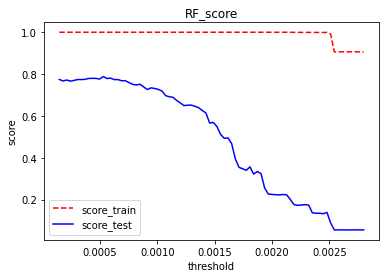

In [30]:
from matplotlib import pyplot as plt
x = np.linspace(b,a,100)[:84]
plt.plot(x,s_tr,'r--',label = 'score_train')
plt.plot(x,s_te,'b',label = 'score_test')
plt.title('RF_score')
plt.xlabel('threshold')
plt.ylabel('score')
plt.legend()
plt.show()

In [25]:
s_tr_ = []
s_te_ = []
for threshold in np.linspace(b,a,100):
    x_var = data.iloc[:,:-1]
    y = np.copy(data.iloc[:,-1])
    RFC_ = RandomForestClassifier(n_estimators = 100,random_state = 42,max_depth = 45)#随机森林实例化
    x_var = SelectFromModel(RFC_,threshold = threshold).fit_transform(x_var,y)
    x_var = pd.DataFrame(x_var)
    x_var['target'] = np.copy(data.iloc[:,-1])
    try:
        data_model,score_train,score_test = Svm(data = x_var,random_state = 0,train_size = 0.8,sts = True)
    except:
        break
    s_tr_.append(score_train)
    s_te_.append(score_test)
    print('threshold =',threshold)
    print('特征数量为：',len(x_var.columns)-1)
    print('训练集准确率:%f'%score_train)
    print('测试集准确率:%f'%score_test)
    print('-'*100)

104 104
threshold = 0.00014330032412417486
特征数量为： 2047
训练集准确率:1.000000
测试集准确率:0.947674
----------------------------------------------------------------------------------------------------
104 104
threshold = 0.00017529103064017142
特征数量为： 2046
训练集准确率:1.000000
测试集准确率:0.947980
----------------------------------------------------------------------------------------------------
104 104
threshold = 0.000207281737156168
特征数量为： 2026
训练集准确率:1.000000
测试集准确率:0.948286
----------------------------------------------------------------------------------------------------
104 104
threshold = 0.00023927244367216455
特征数量为： 1957
训练集准确率:1.000000
测试集准确率:0.948592
----------------------------------------------------------------------------------------------------
104 104
threshold = 0.0002712631501881611
特征数量为： 1847
训练集准确率:1.000000
测试集准确率:0.949816
----------------------------------------------------------------------------------------------------
104 104
threshold = 0.00030325385670415767
特征数量为： 1688
训练集准确率:1

104 104
threshold = 0.0015828821173440202
特征数量为： 20
训练集准确率:0.597674
测试集准确率:0.516218
----------------------------------------------------------------------------------------------------
104 104
threshold = 0.0016148728238600167
特征数量为： 20
训练集准确率:0.597674
测试集准确率:0.516218
----------------------------------------------------------------------------------------------------
104 104
threshold = 0.0016468635303760132
特征数量为： 18
训练集准确率:0.538909
测试集准确率:0.472460
----------------------------------------------------------------------------------------------------
104 104
threshold = 0.00167885423689201
特征数量为： 14
训练集准确率:0.447012
测试集准确率:0.395655
----------------------------------------------------------------------------------------------------
104 104
threshold = 0.0017108449434080064
特征数量为： 12
训练集准确率:0.392685
测试集准确率:0.352203
----------------------------------------------------------------------------------------------------
104 104
threshold = 0.001742835649924003
特征数量为： 11
训练集准确率:0.370878
测试集准确率:0.3

e:\python\lib\site-packages\sklearn\feature_selection\_base.py:79: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warn("No features were selected: either the data is"


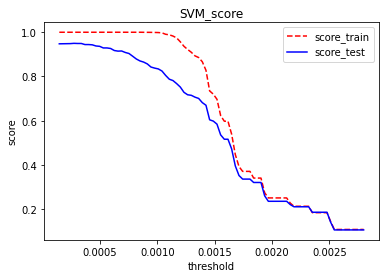

In [29]:
from matplotlib import pyplot as plt
x = np.linspace(b,a,100)[:84]
plt.plot(x,s_tr_,'r--',label = 'score_train')
plt.plot(x,s_te_,'b',label = 'score_test')
plt.title('SVM_score')
plt.xlabel('threshold')
plt.ylabel('score')
plt.legend()
plt.show()

In [24]:
def Svm(data = None,kernel='linear',degree = 1,sts = False,random_state=1,train_size=0.6,max_iter = -1,have_data = False,x_train = None,x_test = None,y_train = None,y_test = None):
    '''支持向量机
    kernel:核
    ret-->    projection_result,score'''
    if have_data == False:
        target = data['target']
        data_ = data.drop(['target'],axis = 1)
        if sts == True:
            data_ = StandardScaler().fit_transform(data_)
        x_train,x_test,y_train,y_test = train_test_split(data_, target, random_state=random_state, train_size=train_size,stratify=target)
    print(np.unique(y_train).size,np.unique(y_test).size)
    clf = SVC(C=0.8, kernel=kernel, gamma='auto',degree = degree,max_iter = max_iter).fit(x_train,y_train)
    score_train = clf.score(x_train,y_train)
    score_test = clf.score(x_test,y_test)
    return [clf,score_train,score_test]

In [12]:
from sklearn.feature_selection import VarianceThreshold
number = np.median(data.iloc[:,:-1].var().values)
selector = VarianceThreshold(number)

In [13]:
x_var = selector.fit_transform(data.iloc[:,:-1])

In [14]:
x_var = pd.DataFrame(x_var)
x_var['target'] = data.iloc[:,-1]

In [47]:
data_model,score_train,score_test = Svm(data = data,random_state = 42,train_size = 0.6)

104 104


In [48]:
print(score_train)
print('--------------')
print(score_test)

1.0
--------------
0.9629773014385264


In [ ]:
data_model_,score_train_,score_test_ = rf(data = data,random_state = 42,train_size = 0.6)

In [49]:
nums = range(50,550,50)
scores_train = []
scores_test = []
for i in nums:
    data_model,score_train,score_test = rf(data = data,random_state = 42,train_size = 0.8,n_estimators = i)
    scores_train.append(score_train)
    scores_test.append(score_test)

104 104
104 104
104 104
104 104
104 104


MemoryError: could not allocate 54525952 bytes

In [ ]:
nums = range(50,550,50)
from matplotlib import pyplot as plt
plt.plot(nums,scores_train)
plt.plot(nums,scores_test)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.legend(['score_train','score_test'])
plt.show()

In [35]:
max(scores_test)

0.8298653610771114

In [23]:
import joblib
joblib.dump(data_model,'data_model')

['data_model']

In [13]:
num_var = np.linspace(number-0.2,number+0.2,20)     #以数据方差中位数为中心，邻域0.2，生成20个数

In [14]:
# data = get_train_imgs(filePath,img_size = 150)

In [14]:
scores_train = []
scores_test = []
for i in num_var:
    selector = VarianceThreshold(i)
    x_var = selector.fit_transform(data.iloc[:,:-1])
    x_var = pd.DataFrame(x_var)
    x_var['target'] = data.iloc[:,-1]
    data_model,score_train,score_test = Svm(data = x_var,random_state = 42,train_size = 0.8)
    scores_train.append(score_train)
    scores_test.append(score_test)

104 104
104 104
104 104
104 104
104 104
104 104


MemoryError: Unable to allocate 791. MiB for an array with shape (50629, 2048) and data type float64

In [13]:
import joblib
joblib.dump(scores_train,'scores_train')
joblib.dump(scores_test,'scores_test')

['scores_test']

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
#画学习曲线
plt.plot(num_var,scores_train,'r')
plt.plot(num_var,scores_test,'b--')
plt.title('score_learn')
plt.xlabel('var')
plt.ylabel('score')
plt.legend(['score_train','score_test'])
plt.show()

In [16]:
num_var_new = np.linspace(0.5,0.7,20)

In [17]:
for i in num_var_new:
    selector = VarianceThreshold(i)
    x_var = selector.fit_transform(data.iloc[:,:-1])
    x_var = pd.DataFrame(x_var)
    x_var['target'] = data.iloc[:,-1]
    data_model,score_train,score_test = rf(data = x_var,random_state = 0)
    scores_train.append(score_train)
    scores_test.append(score_test)

104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104


In [18]:
num_var_ = np.append(num_var,num_var_new)

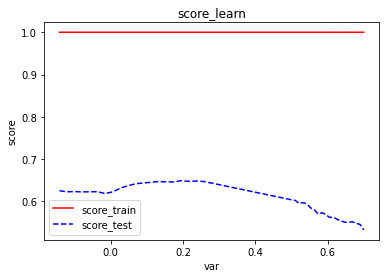

In [19]:
plt.plot(num_var_,scores_train,'r')
plt.plot(num_var_,scores_test,'b--')
plt.title('score_learn')
plt.xlabel('var')
plt.ylabel('score')
plt.legend(['score_train','score_test'])
plt.show()

In [20]:
max_var = num_var_[np.where(np.array(scores_test)==max(scores_test))[0]]

In [21]:
max_var

array([0.19516029])

In [22]:
num_vars = np.where(np.array(data.iloc[:,:-1].var())<=max_var)[0]

In [23]:
max(scores_test)

0.6487208116898878

In [24]:
selector = VarianceThreshold(max_var)
x_var = selector.fit_transform(data.iloc[:,:-1])
x_var = pd.DataFrame(x_var)
x_var['target'] = data.iloc[:,-1]
scores_train_new = []
scores_test_new = []
for i in range(21,71):
    data_model,score_train,score_test = rf(data = x_var,random_state = 0,n_estimators = i)
    scores_train_new.append(score_train)
    scores_test_new.append(score_test)

104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104


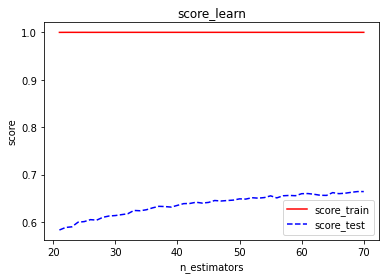

In [25]:
plt.plot(range(21,71),scores_train_new,'r')
plt.plot(range(21,71),scores_test_new,'b--')
plt.title('score_learn')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.legend(['score_train','score_test'])
plt.show()

In [26]:
n_location = np.where(np.array(scores_test_new)==max(scores_test_new))[0][0]
b = range(20,71)
n_es = b[n_location]
print(n_es)

68


In [27]:
a = np.linspace(max_var-0.02,max_var+0.02,40)
s_train = []
s_test = []
for i in a:
    selector = VarianceThreshold(i)
    x_var = selector.fit_transform(data.iloc[:,:-1])
    x_var = pd.DataFrame(x_var)
    x_var['target'] = data.iloc[:,-1]
    data_model,score_train,score_test = rf(data = x_var,random_state = 0)
    s_train.append(score_train)
    s_test.append(score_test)

104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104


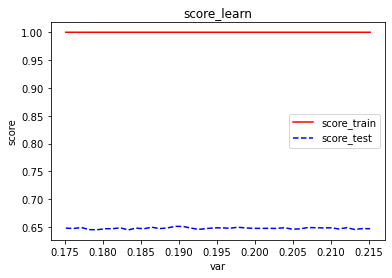

In [28]:
plt.plot(a,s_train,'r')
plt.plot(a,s_test,'b--')
plt.title('score_learn')
plt.xlabel('var')
plt.ylabel('score')
plt.legend(['score_train','score_test'])
plt.show()

In [30]:
n_location = np.where(np.array(scores_test_new)==max(scores_test_new))[0][0]
b = range(20,71)
n_es = b[n_location]
print(n_es)

68


In [31]:
selector = VarianceThreshold(max_var)
x_var = selector.fit_transform(data.iloc[:,:-1])
x_var = pd.DataFrame(x_var)
x_var['target'] = data.iloc[:,-1]
scores_train_new = []
scores_test_new = []
for i in range(20,51):
    data_model,score_train,score_test = rf(data = x_var,random_state = 0,n_estimators = n_es,max_depth = i)
    scores_train_new.append(score_train)
    scores_test_new.append(score_test)

104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104


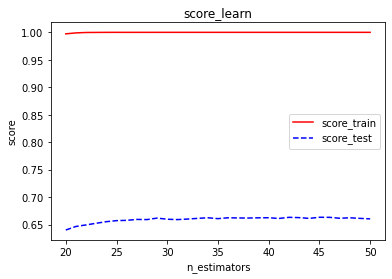

In [34]:
plt.plot(range(20,51),scores_train_new,'r')
plt.plot(range(20,51),scores_test_new,'b--')
plt.title('score_learn')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.legend(['score_train','score_test'])
plt.show()

In [43]:
location = np.where(np.array(scores_test_new)==max(scores_test_new))[0]
c = range(20,51)
max_depth_ = c[location[0]]
print(max_depth_)

45


In [45]:
max(scores_test_new)

0.6634302636050293

In [46]:
for i in range(51,101):
    data_model,score_train,score_test = rf(data = x_var,random_state = 0,n_estimators = n_es,max_depth = i)
    scores_train_new.append(score_train)
    scores_test_new.append(score_test)

104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104
104 104


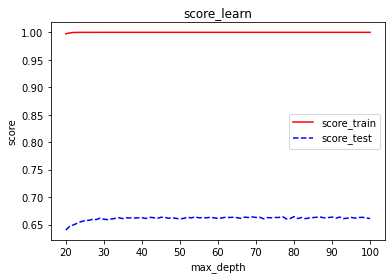

In [50]:
plt.plot(range(20,101),scores_train_new,'r')
plt.plot(range(20,101),scores_test_new,'b--')
plt.title('score_learn')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.legend(['score_train','score_test'])
plt.show()

In [49]:
max(scores_test_new)

0.6647045973105491

In [55]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [53]:
x_ = x_var.iloc[:,:-1]
y_ = x_var.iloc[:,-1]

In [58]:
x_fschi = SelectKBest(chi2,k=300).fit_transform(x_,y_)
x_var_ = DataFrame(x_fschi)
x_var_['target'] = y_

In [61]:
data_model,score_train,score_test = rf(data = x_var_)

104 104


In [63]:
print(score_train)
print('-----------')
print(score_test)

1.0
-----------
0.6466818777610563


In [107]:
selector = VarianceThreshold(max_var)
x_var = selector.fit_transform(data.iloc[:,:-1])
x_var = pd.DataFrame(x_var)
x_var['target'] = data.iloc[:,-1]
data_model,score_train,score_test = rf(data = x_var,random_state = 0,n_estimators = 63)

104 104


In [108]:
print(score_train)
print('-------------')
print(score_test)

1.0
-------------
0.5638680894361972


In [100]:
number_var = data.iloc[:,:-1].var().values
location = np.where(number_var <= max_var)[0]

In [104]:
data.drop(data.columns[location],axis = 1,inplace = True)

In [105]:
data

,50,68,82,115,140,184,186,204,249,334,...,1769,1805,1818,1838,1856,1952,1971,2008,2035,target
0,2.029764,0.107510,0.841237,1.413267,0.894694,1.807688,2.706053,0.561049,1.687882,0.523860,...,0.081868,0.020028,1.730571,0.946327,1.573209,0.692970,0.869795,1.447323,1.949489,0
1,1.563928,0.059336,0.252898,0.811333,0.451519,2.019778,2.572253,0.644330,1.284076,1.066929,...,0.078352,0.000000,1.253508,0.965499,2.588631,0.612374,0.922068,0.936405,0.511379,0
2,2.658684,0.008802,0.408691,1.277629,1.899195,1.126961,3.074686,0.005124,1.425292,0.432891,...,0.000000,0.000000,0.427821,0.744231,2.422109,0.192786,0.854320,1.700966,1.929059,0
3,1.367423,0.249107,2.731459,0.325498,2.844054,2.013674,4.263965,0.043518,0.908804,0.982026,...,0.245944,0.278697,0.544115,0.863820,1.476943,0.716402,2.454421,0.094801,0.754309,0
4,1.625419,0.074459,0.816589,0.276554,1.287139,1.903443,4.337196,0.383728,0.919022,0.195503,...,1.127508,0.436814,1.078216,0.591805,2.236411,0.397102,2.577402,0.637636,1.385357,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191640,1.311690,0.068179,1.426739,0.206891,0.325206,0.233443,6.359915,0.000000,0.454559,0.170908,...,3.054931,0.134161,1.729751,0.258318,3.668587,1.821962,4.869658,0.745100,1.702854,103
191641,1.236122,0.035117,1.903564,0.013038,0.213146,0.117778,7.224601,0.000000,0.284747,0.543595,...,2.505177,0.078201,1.929453,0.000000,2.356084,1.867183,5.193253,0.201371,2.932915,103
191642,0.561354,0.108199,0.135889,0.133616,0.298224,0.165982,5.142556,0.127475,0.256536,0.243632,...,1.948220,0.012779,0.671461,0.091915,3.255402,1.023160,2.917643,0.348858,0.457295,103
191643,0.786001,0.041434,1.805209,0.091380,0.000000,0.223799,6.783127,0.405730,0.767736,0.067630,...,1.111833,0.000000,3.357048,0.000000,1.500085,1.065821,3.967472,0.164558,3.777227,103


# DataFrame一次性删除多列

In [80]:
a = DataFrame(np.arange(12).reshape(3,4))

a.columns = ['a','b','c','d']

x = [1,2]

a.drop(a.columns[x],axis = 1,inplace = True)